In [2]:
import pandas as pd
import psycopg2
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")

# Connect to my database
# Database connection parameters
conn = psycopg2.connect(
    host="",
    port="",  
    database="",  
    user="",  
    password=""  
)

cursor = conn.cursor()

In [6]:
# Query for UCLA offensive stats along with weather, altitude, and distance
query = """
SELECT date, location, opponent, result,
       opponent_passing_cmp, opponent_passing_att, opponent_completion_pct, opponent_passing_yds, opponent_passing_td, 
       opponent_rushing_att, opponent_rushing_yds, opponent_rushing_avg, opponent_rushing_td, opponent_total_plays, opponent_total_yards, opponent_avg_yds,
       opponent_pass_first_downs, opponent_rush_first_downs, opponent_first_down_pens, opponent_total_first_downs, 
       opponent_total_penalties, opponent_total_penalties_yds, opponent_total_fum, opponent_total_int, opponent_total_to,
       temp_f, precipitation_in, windspeed_mph, altitude_m, distance_from
FROM UCLA_Defensive_Stats;
"""

ucla_data = pd.read_sql(query, conn)


ucla_data.head()

,date,location,opponent,result,opponent_passing_cmp,opponent_passing_att,opponent_completion_pct,opponent_passing_yds,opponent_passing_td,opponent_rushing_att,...,opponent_total_penalties,opponent_total_penalties_yds,opponent_total_fum,opponent_total_int,opponent_total_to,temp_f,precipitation_in,windspeed_mph,altitude_m,distance_from
0,2023-09-02,H,Coastal Carolina,W (27-13),28,43,65.1,289,1,34,...,3,45,1,2,3,73.4,0.03,6.6,263.0,0.00
1,2023-09-09,@,San Diego State,W (35-10),20,38,52.6,196,1,33,...,4,40,0,3,3,76.1,0.00,12.9,25.0,117.10
2,2023-09-16,H,North Carolina Central,W (59-7),17,31,54.8,142,0,37,...,4,25,1,1,2,68.6,0.00,5.6,263.0,0.00
3,2023-09-23,@,Utah,L (7-14),9,17,52.9,117,1,48,...,4,30,1,0,1,57.5,0.00,10.5,1433.0,586.62
4,2023-10-07,H,Washington State,W (25-17),20,40,50.0,204,1,19,...,4,20,2,2,4,73.2,0.00,6.1,263.0,0.00


In [8]:

# distance ranges
bins = [0, 500, 1000, 1500, 4000]
labels = ['<500', '500-1000', '1000-1500', '1500+']

# new column for distance categories
ucla_data['Distance_Range'] = pd.cut(ucla_data['distance_from'], bins=bins, labels=labels, right=False)

# Group by distance range and calculate mean values for the metrics
distance_grouped = ucla_data.groupby('Distance_Range').agg({
    'opponent_passing_yds': 'mean',
    'opponent_rushing_yds': 'mean',
    'opponent_total_yards': 'mean',
    'opponent_completion_pct': 'mean',
    'opponent_passing_td': 'mean',
    'opponent_rushing_att': 'mean',
    'opponent_passing_att': 'mean', 
    'opponent_rushing_td': 'mean',
    'opponent_total_first_downs': 'mean',
    'opponent_total_to': 'mean'
}).reset_index()


distance_grouped.head()


,Distance_Range,opponent_passing_yds,opponent_rushing_yds,opponent_total_yards,opponent_completion_pct,opponent_passing_td,opponent_rushing_att,opponent_passing_att,opponent_rushing_td,opponent_total_first_downs,opponent_total_to
0,<500,237.19802,162.782178,399.980198,60.50297,1.435644,38.782178,34.930693,1.643564,22.059406,1.445545
1,500-1000,241.62500,179.541667,421.166667,62.42500,1.708333,41.625000,32.166667,2.000000,22.958333,1.708333
2,1000-1500,256.40000,133.400000,389.800000,60.12000,2.200000,36.000000,39.000000,1.800000,22.400000,1.200000
3,1500+,302.00000,152.333333,454.333333,64.20000,3.333333,41.666667,36.666667,0.333333,22.000000,2.666667


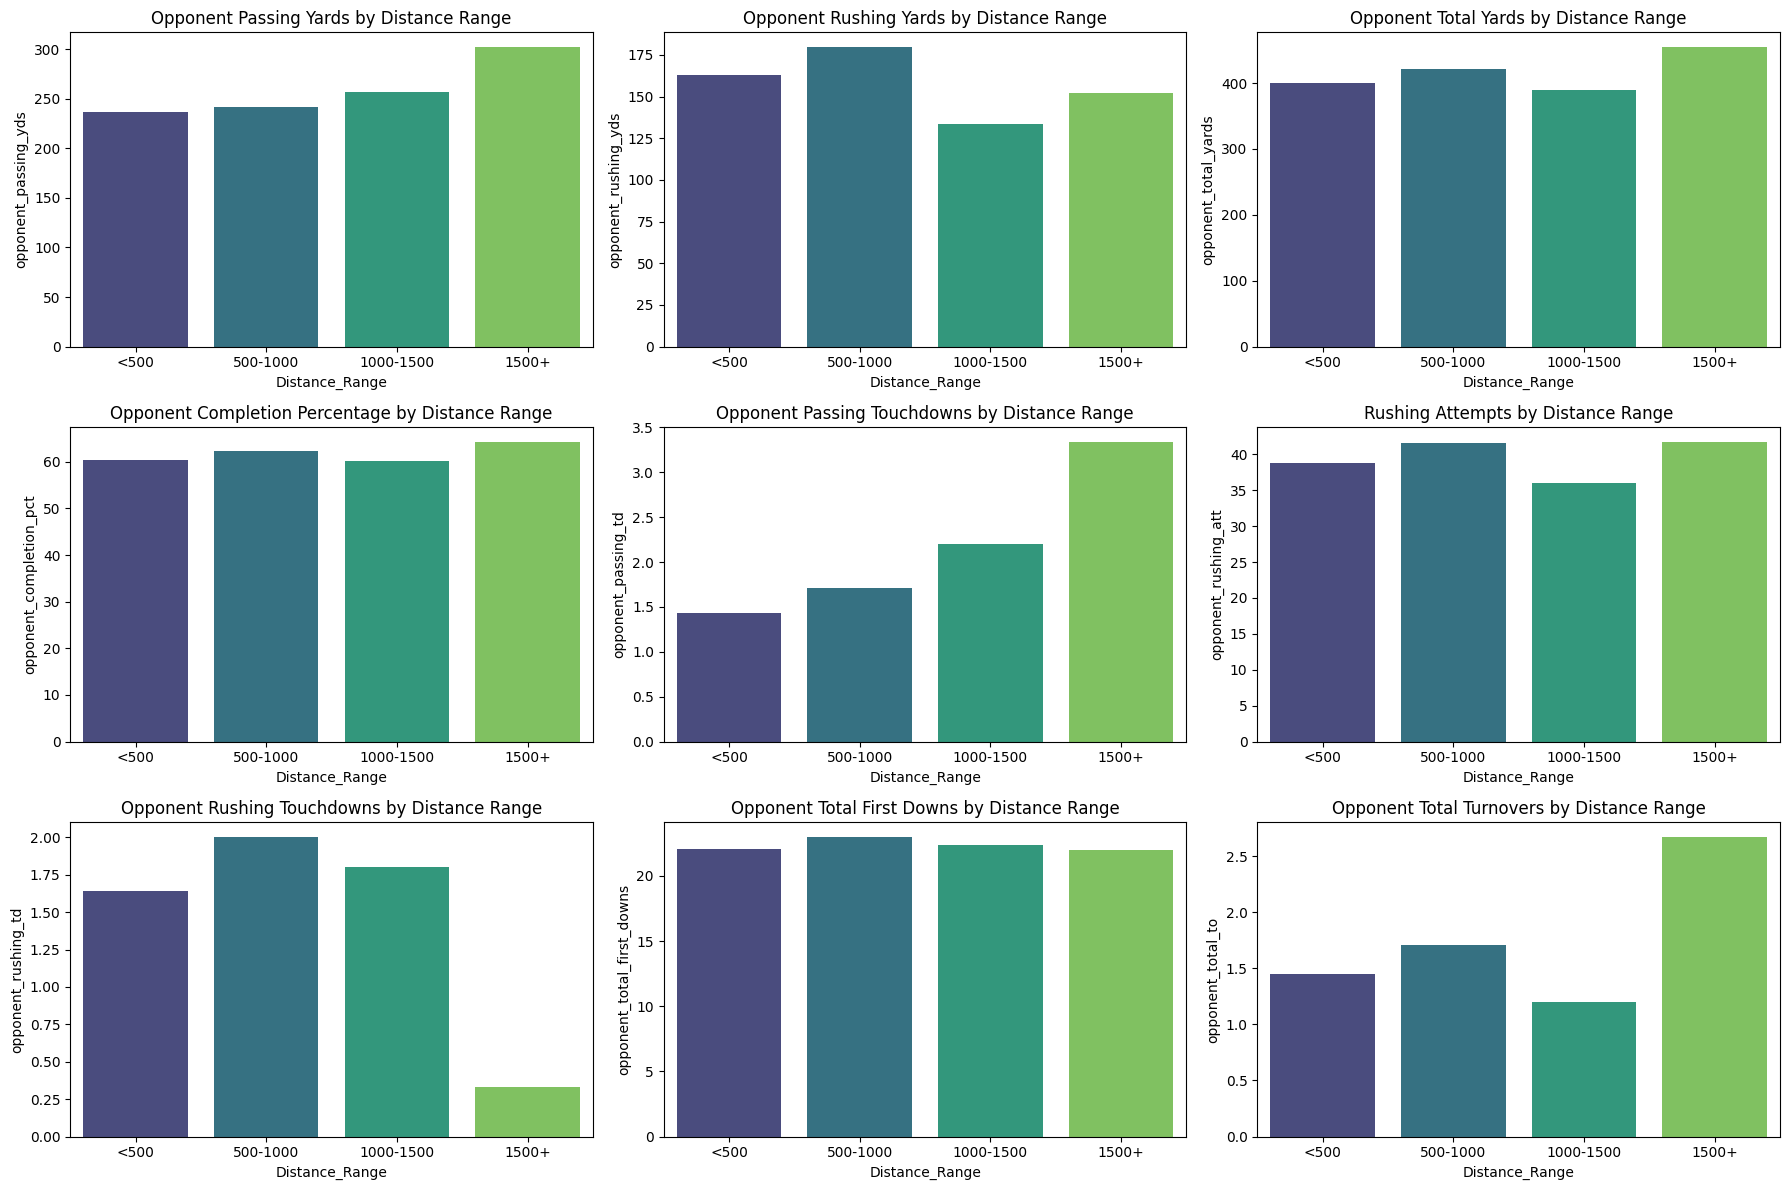

In [13]:

fig, axs = plt.subplots(3, 3, figsize=(18, 12))

# Passing Yards
sns.barplot(x='Distance_Range', y='opponent_passing_yds', data=distance_grouped, hue='Distance_Range', palette='viridis', ax=axs[0, 0], legend=False)
axs[0, 0].set_title('Opponent Passing Yards by Distance Range')

# Rushing Yards
sns.barplot(x='Distance_Range', y='opponent_rushing_yds', data=distance_grouped, hue='Distance_Range', palette='viridis', ax=axs[0, 1], legend=False)
axs[0, 1].set_title('Opponent Rushing Yards by Distance Range')

# Total Yards
sns.barplot(x='Distance_Range', y='opponent_total_yards', data=distance_grouped, hue='Distance_Range', palette='viridis', ax=axs[0, 2], legend=False)
axs[0, 2].set_title('Opponent Total Yards by Distance Range')

# Completion Percentage
sns.barplot(x='Distance_Range', y='opponent_completion_pct', data=distance_grouped, hue='Distance_Range', palette='viridis', ax=axs[1, 0], legend=False)
axs[1, 0].set_title('Opponent Completion Percentage by Distance Range')

# Passing Touchdowns
sns.barplot(x='Distance_Range', y='opponent_passing_td', data=distance_grouped, hue='Distance_Range', palette='viridis', ax=axs[1, 1], legend=False)
axs[1, 1].set_title('Opponent Passing Touchdowns by Distance Range')

# Rushing Attempts
sns.barplot(x='Distance_Range', y='opponent_rushing_att', data=distance_grouped, hue='Distance_Range', palette='viridis', ax=axs[1, 2], legend=False)
axs[1, 2].set_title('Rushing Attempts by Distance Range')

# Rushing Touchdowns
sns.barplot(x='Distance_Range', y='opponent_rushing_td', data=distance_grouped, hue='Distance_Range', palette='viridis', ax=axs[2, 0], legend=False)
axs[2, 0].set_title('Opponent Rushing Touchdowns by Distance Range')

# Total First Downs
sns.barplot(x='Distance_Range', y='opponent_total_first_downs', data=distance_grouped, hue='Distance_Range', palette='viridis', ax=axs[2, 1], legend=False)
axs[2, 1].set_title('Opponent Total First Downs by Distance Range')

# Total Turnovers
sns.barplot(x='Distance_Range', y='opponent_total_to', data=distance_grouped, hue='Distance_Range', palette='viridis', ax=axs[2, 2], legend=False)
axs[2, 2].set_title('Opponent Total Turnovers by Distance Range')


plt.tight_layout()
plt.show()


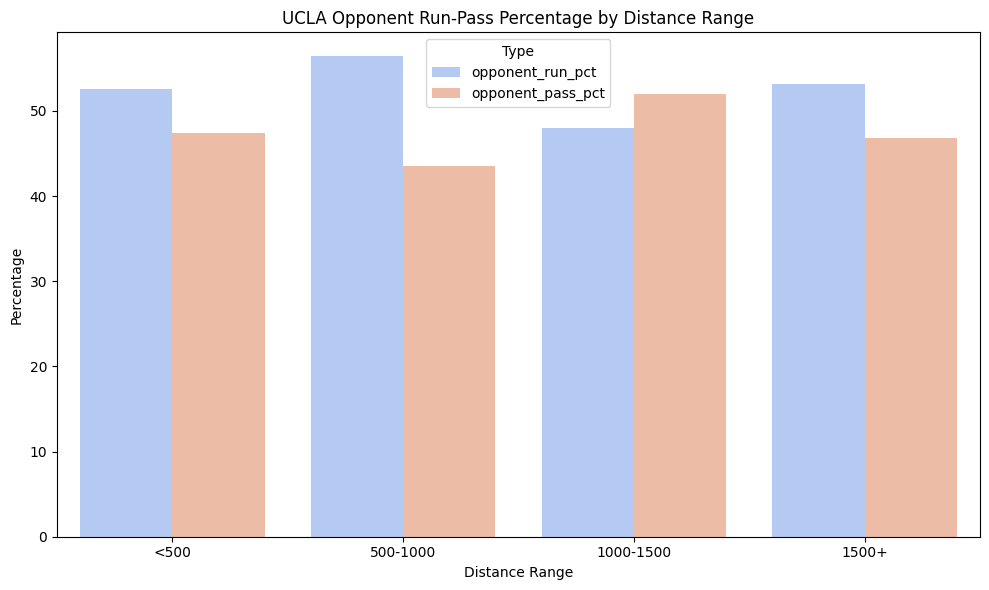

In [12]:
# Run-Pass Percentage
distance_grouped['opponent_run_pct'] = distance_grouped['opponent_rushing_att'] / (distance_grouped['opponent_rushing_att'] + distance_grouped['opponent_passing_att']) * 100
distance_grouped['opponent_pass_pct'] = distance_grouped['opponent_passing_att'] / (distance_grouped['opponent_rushing_att'] + distance_grouped['opponent_passing_att']) * 100


fig, ax = plt.subplots(figsize=(10, 6))

# Plot Run and Pass Percentages side by side
distance_grouped_melted = pd.melt(distance_grouped, id_vars=['Distance_Range'], value_vars=['opponent_run_pct', 'opponent_pass_pct'], var_name='Type', value_name='Percentage')

sns.barplot(x='Distance_Range', y='Percentage', hue='Type', data=distance_grouped_melted, palette='coolwarm')

# Add titles and labels
ax.set_title('UCLA Opponent Run-Pass Percentage by Distance Range')
ax.set_ylabel('Percentage')
ax.set_xlabel('Distance Range')

# Display
plt.tight_layout()
plt.show()


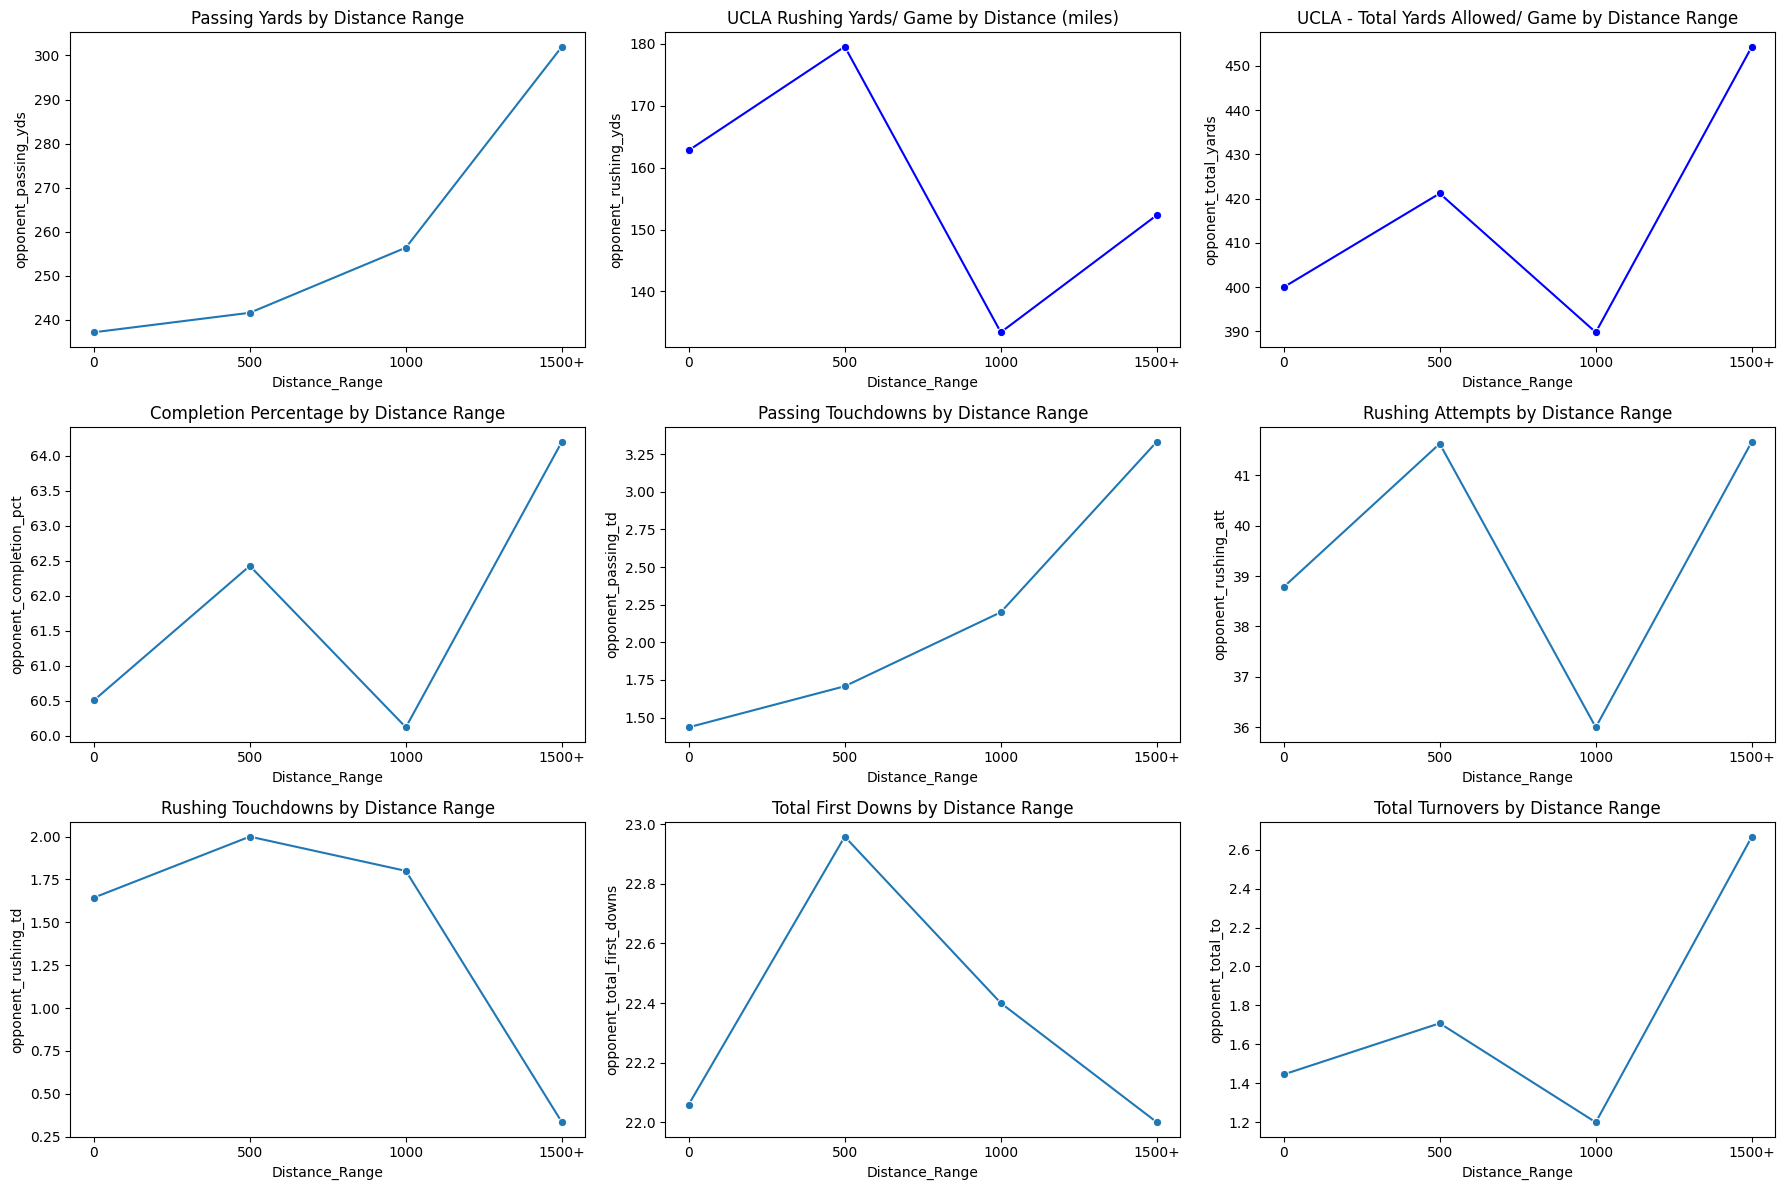

In [17]:

fig, axs = plt.subplots(3, 3, figsize=(18, 12))

# labels for the Distance Range
distance_labels = ['0', '500', '1000', '1500+']

# Passing Yards
sns.lineplot(x='Distance_Range', y='opponent_passing_yds', data=distance_grouped, marker='o', ax=axs[0, 0])
axs[0, 0].set_title('Passing Yards by Distance Range')
axs[0, 0].set_xticklabels(distance_labels)

# Rushing Yards
sns.lineplot(x='Distance_Range', y='opponent_rushing_yds', data=distance_grouped, marker='o', ax=axs[0, 1], color = 'blue')
axs[0, 1].set_title('UCLA Rushing Yards/ Game by Distance (miles)')
axs[0, 1].set_xticklabels(distance_labels)

# Total Yards
sns.lineplot(x='Distance_Range', y='opponent_total_yards', data=distance_grouped, marker='o', ax=axs[0, 2], color = 'blue')
axs[0, 2].set_title('UCLA - Total Yards Allowed/ Game by Distance Range')
axs[0, 2].set_xticklabels(distance_labels)

# Completion Percentage
sns.lineplot(x='Distance_Range', y='opponent_completion_pct', data=distance_grouped, marker='o', ax=axs[1, 0])
axs[1, 0].set_title('Completion Percentage by Distance Range')
axs[1, 0].set_xticklabels(distance_labels)

# Passing Touchdowns
sns.lineplot(x='Distance_Range', y='opponent_passing_td', data=distance_grouped, marker='o', ax=axs[1, 1])
axs[1, 1].set_title('Passing Touchdowns by Distance Range')
axs[1, 1].set_xticklabels(distance_labels)

# Rushing Attempts
sns.lineplot(x='Distance_Range', y='opponent_rushing_att', data=distance_grouped, marker='o', ax=axs[1, 2])
axs[1, 2].set_title('Rushing Attempts by Distance Range')
axs[1, 2].set_xticklabels(distance_labels)

# Rushing Touchdowns
sns.lineplot(x='Distance_Range', y='opponent_rushing_td', data=distance_grouped, marker='o', ax=axs[2, 0])
axs[2, 0].set_title('Rushing Touchdowns by Distance Range')
axs[2, 0].set_xticklabels(distance_labels)

# Total First Downs
sns.lineplot(x='Distance_Range', y='opponent_total_first_downs', data=distance_grouped, marker='o', ax=axs[2, 1])
axs[2, 1].set_title('Total First Downs by Distance Range')
axs[2, 1].set_xticklabels(distance_labels)

# Total Turnovers
sns.lineplot(x='Distance_Range', y='opponent_total_to', data=distance_grouped, marker='o', ax=axs[2, 2])
axs[2, 2].set_title('Total Turnovers by Distance Range')
axs[2, 2].set_xticklabels(distance_labels)


plt.tight_layout()
plt.show()
